# Working with Time Series Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [1]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt
import seaborn as sns

from vega_datasets import data

import warnings
warnings.filterwarnings('ignore')

## SF Temps

In [2]:
sf = data.sf_temps()
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
sf = sf.set_index('date').sort_index()
sf.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


1) Resample by the day and take the average temperature.

In [4]:
sf.resample('d').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


Visualize the average temperature over time.

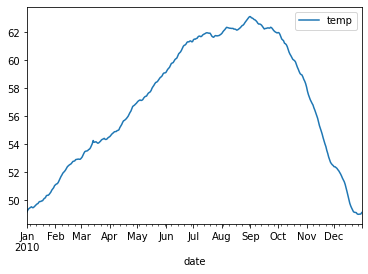

In [5]:
sf.resample('d').mean().plot()
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

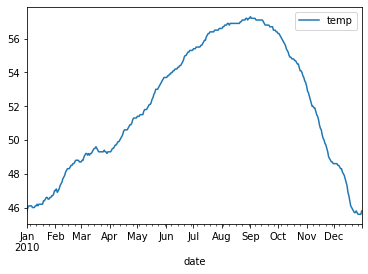

In [6]:
sf.resample('d').min().plot()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

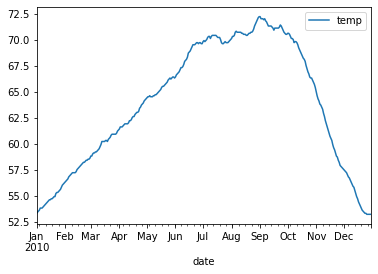

In [7]:
sf.resample('d').max().plot()
plt.show()

4. Which month is the coldest, on average?

In [8]:
sf.resample('M').mean().idxmin().dt.month_name()

temp    January
dtype: object

5. Which month has the highest average temperature?

In [9]:
sf.resample('M').mean().idxmax().dt.month_name()

temp    September
dtype: object

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])).

In [10]:
minmax = sf.resample('d').agg(['min','max'])

 Use this resampled dataframe to calculate the change in temperature for the day.

In [11]:
minmax['delta'] = minmax['temp']['max'] - minmax['temp']['min']
minmax['delta'] = minmax['delta'].astype('int')

Which month has the highest daily temperature variability?

In [12]:
minmax.delta.idxmax().month_name()

'August'

In [13]:
# As one line from original database
sf.resample('d').agg(['min','max']).diff(axis=1).idxmax().dt.month_name()

temp  min       NaN
      max    August
dtype: object

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

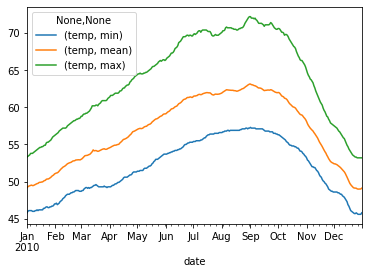

In [14]:
sf.resample('d').agg(['min','mean','max']).plot()
plt.show()

## Seattle Weather

In [15]:
sw = data.seattle_weather()
sw = sw.set_index('date').sort_index()
sw.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [16]:
sw['precipitation'].resample('M').max().idxmax().month_name(), sw['precipitation'].resample('M').max().idxmax().year

('March', 2015)

2. Visualize the amount of monthly precipitation over time.

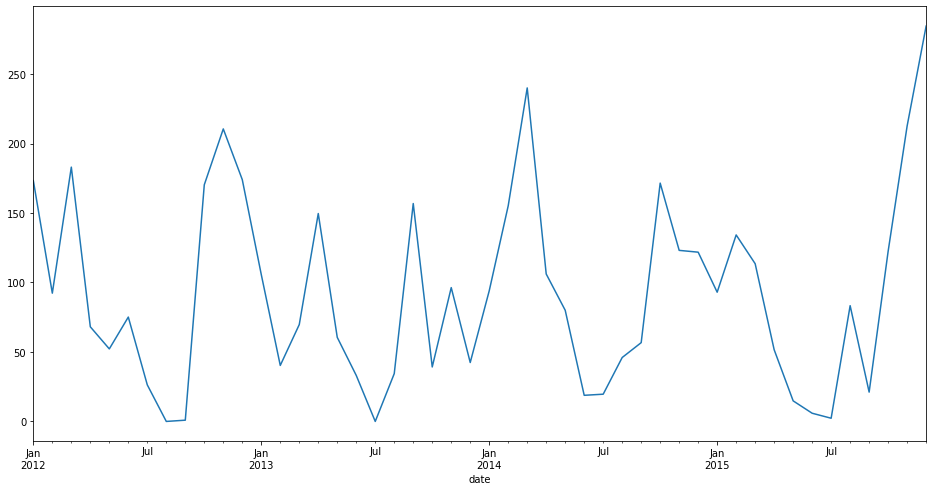

In [17]:
sw['precipitation'].resample('M').sum().plot(figsize=(16,8))
plt.show()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

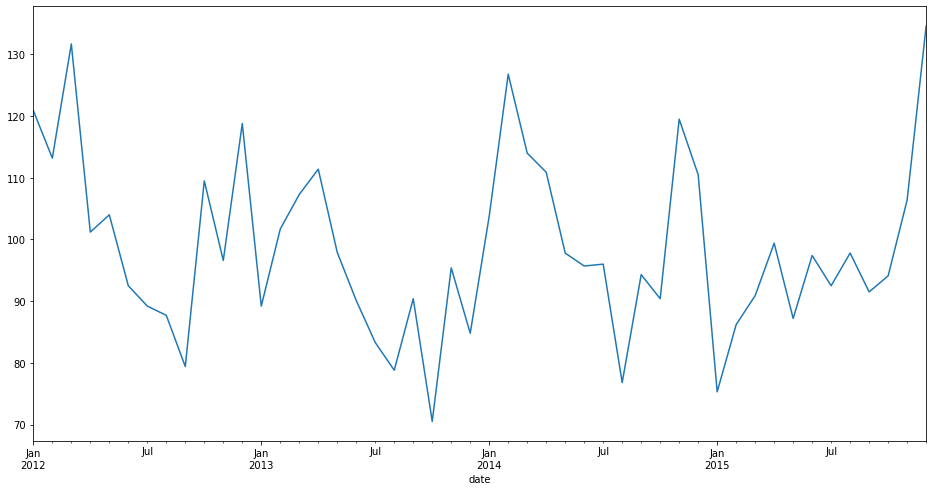

In [18]:
sw['wind'].resample('M').sum().plot(figsize=(16,8))
plt.show()

4. Which year-month combination is the windiest?

In [19]:
sw['wind'].resample('M').max().idxmax().month_name(), sw['wind'].resample('M').max().idxmax().year

('December', 2012)

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [20]:
sw[sw['weather']=='sun'].resample('Y')['weather'].count().idxmax().year

2014

6. In which month does it rain the most?

In [21]:
sw['precipitation'].groupby(sw.index.month_name()).sum().idxmax()

'November'

7. Which month has the most number of days with a non-zero amount of precipitation?

In [22]:
(sw['precipitation'] != 0).groupby(sw.index.month_name()).count().idxmax()

'August'

## Flights 20k

In [23]:
flights = data.flights_20k()
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


1. Convert any negative delays to 0.

In [24]:
flights['delay'][flights['delay'] < 0] = 0

2. Which hour of the day has the highest average delay?

In [25]:
flights.groupby(flights.index.hour)['delay'].mean().idxmax()

3

3. Does the day of the week make a difference in the delay amount?

In [26]:
flights['day'] = flights.index.day_name()

In [27]:
flights.groupby('day')['delay'].sum()

day
Friday       53770
Monday       21354
Saturday     19755
Sunday       27221
Thursday     38605
Tuesday      27715
Wednesday    33969
Name: delay, dtype: int64

In [28]:
flights.groupby('day')['delay'].mean()

day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

- Yes it does.

4. Does the month make a difference in the delay amount?

In [29]:
flights['month'] = flights.index.month_name()

In [30]:
flights.groupby('month')['delay'].sum()

month
February    76987
January     76670
March       68732
Name: delay, dtype: int64

In [31]:
flights.groupby('month')['delay'].mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

- Yes, just not as drastically as the day. Only have 3 months of data so we can only tell so much.

## Bonus

In [32]:
iowa = data.iowa_electricity()
#iowa = iowa.set_index('year').sort_index()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


1. For each row, calculate the percentage of the year's total that energy source provided.

In [33]:
piowa = iowa.pivot_table(index='year',columns='source',values='net_generation')
piowa.head()

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724


In [34]:
for col in piowa:
    new_col_vals = []
    for index, row in piowa.iterrows():
        rowsum = row.sum()
        col_cell_val = row[col]
        new_col_vals.append(col_cell_val / rowsum)
    piowa[col +'_ratio'] = new_col_vals
    
piowa.head()

source,Fossil Fuels,Nuclear Energy,Renewables,Fossil Fuels_ratio,Nuclear Energy_ratio,Renewables_ratio
year,,,,,,
2001-01-01,35361,3853,1437,0.869868,0.094780,0.035349
2002-01-01,35991,4574,1963,0.846290,0.107551,0.046157
2003-01-01,36234,3988,1885,0.860522,0.094709,0.044766
2004-01-01,36205,4929,2102,0.837381,0.114000,0.048616
2005-01-01,36883,4538,2724,0.835497,0.102796,0.061704


2. Lineplot of generation over time, color by source

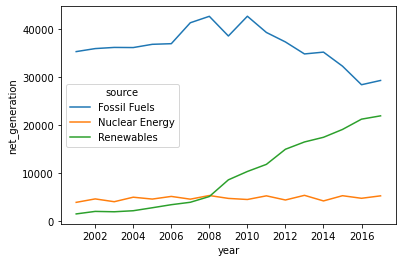

In [35]:
sns.lineplot(x='year',y='net_generation',data=iowa,hue='source')
plt.show()

3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [36]:
Tiowa = iowa.pivot_table(index='source',columns='year',values='net_generation')
Tiowa.head()

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [38]:
#sns.lineplot(x='year',y='net_generation',data=Tiowa,hue='source')

5. Is the total generation increasing over time?

6. How would you control for increasing consumption over time when considering how much energy is coming from each source?

7. express each number as a % of the year's total

## Use the sf_temps dataset

1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

3. Create pretty labels for time plots

4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

## Birdstrikes Dataset

In [ ]:
df = data.birdstrikes()
df.head()